In [ ]:
import gdelt # for gdelt searchs
from gkg_tools import * # for gkg searchs
# %run "../gkg_tools.py" # using magic command run to access the script from the parent directory

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.tokenize import word_tokenize, sent_tokenize


from transformers import pipeline, set_seed
import torch

# # GPU Timing (using GPU 1) else -1 for CPU
device_id = 1 if torch.cuda.is_available() else -1 

here


In [38]:
gkg = gkg_operator() # create a gkg operator
gkg.set_date(['2024 Oct 20', '2024 Oct 21']) # set the date range for the search
gkg.get_gkg(coverage=True) # initiate the search

In [69]:
first_monday = '2024 Sep 30'
# make a list of the next N mondays
N = 10
mondays = pd.date_range(first_monday, periods=7, freq='W-MON').strftime('%Y %b %d').tolist()
mondays

['2024 Sep 30',
 '2024 Oct 07',
 '2024 Oct 14',
 '2024 Oct 21',
 '2024 Oct 28',
 '2024 Nov 04',
 '2024 Nov 11']

In [79]:
# mondays_news = {}
for mon in mondays[2:]:
    gkg.set_date(mon)
    gkg.get_gkg(coverage=True)
    # update mondays_news with the new data
    mondays_news[mon] = gkg.gkg_query.copy()

OSError: [WinError 1450] Insufficient system resources exist to complete the requested service

In [72]:
mondays_news.keys()

dict_keys(['2024 Sep 30', '2024 Oct 07'])

In [73]:
# concatenate the dataframes from monday_news
mondays_news_df = pd.concat(mondays_news.values(), ignore_index=True)

In [76]:
mondays_news_df['date']

0         20240930000000
1         20240930000000
2         20240930000000
3         20240930000000
4         20240930000000
               ...      
280605    20241007234500
280606    20241007234500
280607    20241007234500
280608    20241007234500
280609    20241007234500
Name: date, Length: 280610, dtype: int64

In [77]:
gkg.get_gkg(data=mondays_news_df)

# make a subset of the gkg table

In [78]:
# # persons = ['Eiichiro Oda', 'Shueisha', 'One Piece']
src_name = ['gamerant.com','screenrant.com']
rant = gkg.gkg_query[gkg.gkg_query['sourcecommonname'].isin(src_name)].copy()
# search rant themes for the regex pattern MANGA, count entries
manga = rant[rant['themes'].str.contains('MANGA') == True].copy()
# manga.info()
# gkg.get_gkg(data=rant.iloc[:500]) # stores in gkg.gkg_query as a dataframe
gkg.get_gkg(data=manga) # stores in gkg.gkg_query as a dataframe
gkg.gkg_query.shape


(33, 27)

In [ ]:
# gkg.get_all_soup(limit_output=50) # get the soup for all the urls in the dataframe
# gkg.get_all_soup(limit_output='all')

In [40]:
titles = gkg.parsed_urls

In [42]:
tv = TfidfVectorizer(stop_words='english')
f = tv.fit_transform(titles)
tva = pd.DataFrame(f.toarray(),columns=tv.get_feature_names_out())
tva

,10,1130,1131,13,13th,14,15,1970s,1971,1980s,...,ys,yu,yugioh,zanpakuto,zatanna,zelda,zeno,zero,zoe,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.520862,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


## Representing article titles using t-SNE

### Using TFidf Vectorizer

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


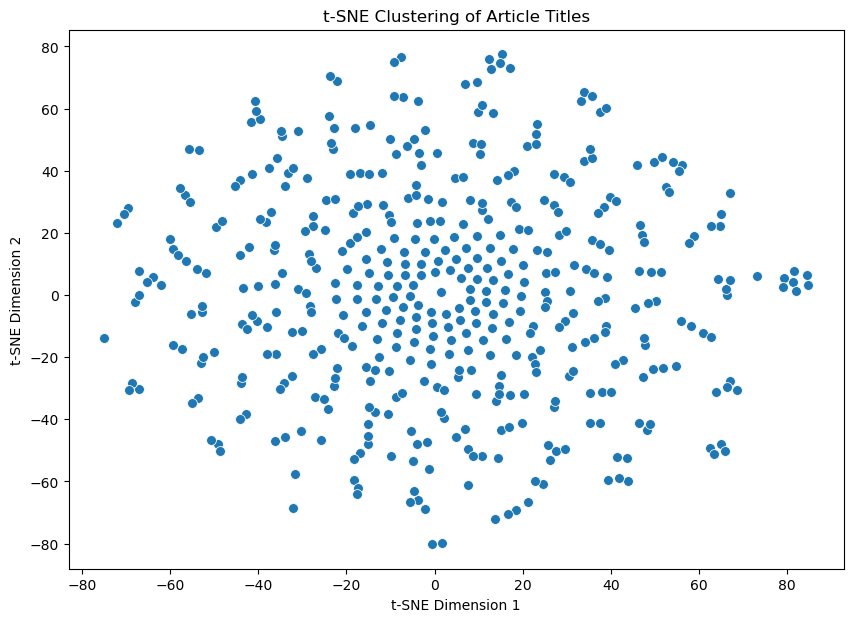

In [43]:

# Step 1: Convert titles to TF-IDF embeddings
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_features=300)  # You can adjust `max_features` as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(titles)

# Step 2: Use t-SNE to reduce dimensions
# Choose perplexity and other parameters based on the dataset size
tsne_model = TSNE(n_components=2, perplexity=20, random_state=42, n_iter=1000)
tsne_results = tsne_model.fit_transform(tfidf_matrix.toarray())

# Step 3: Visualize the t-SNE clusters
# Add results to a DataFrame for easy plotting
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Title'] = titles  # Optionally add titles as a label

plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df, s=50)
plt.title("t-SNE Clustering of Article Titles")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### Using `v2persons` Field with GKG Tools Vectorizer

In [51]:
gkg.parse_gkg_field('persons')

,index,persons_0
0,0,redditor alex
1,1,arnold schwarzenegger
2,1,laura bailey
3,1,tim miller
4,1,dave wilson
...,...,...
5721,499,rosemarie dewitt
5722,499,naomi scott
5723,499,dylan gelula
5724,499,parker finn


In [52]:
gkg.vectorize_field()
gkgvf_arr = gkg.vectorized_df.copy()
gkgvf_arr.values

c:\Users\Corey Dearing\Desktop\gdelt\LLM_projects\gkg_tools.py:122: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



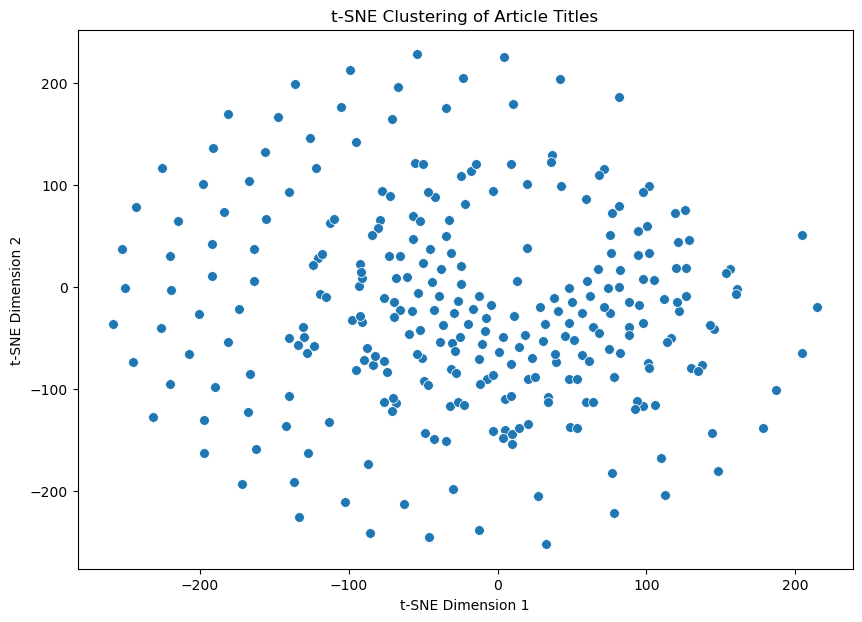

In [53]:

# Step 2: Use t-SNE to reduce dimensions
# Choose perplexity and other parameters based on the dataset size
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_results = tsne_model.fit_transform(gkgvf_arr.values)

# Step 3: Visualize the t-SNE clusters
# Add results to a DataFrame for easy plotting
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Title'] = titles  # Optionally add titles as a label

plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df, s=50)
plt.title("t-SNE Clustering of Article Titles")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [54]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Assuming gkgvf_arr is the DataFrame with vectorized values and article titles as the index
# The values are used as input to the t-SNE model, and index rows are the article titles

article_titles = gkg.parsed_urls  # Extract titles from the index
model_input = gkgvf_arr.values  # Use the values for t-SNE

# Step 1: Use t-SNE to reduce dimensions
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_results = tsne_model.fit_transform(model_input)

# Step 2: Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Title'] = article_titles  # Add titles from the index

# Step 3: Plot with Plotly to add hover functionality
fig = px.scatter(
    tsne_df,
    x='TSNE1',
    y='TSNE2',
    hover_name='Title',  # This will show the title when hovering
    title="t-SNE Clustering of Article Titles",
    labels={'TSNE1': 't-SNE Dimension 1', 'TSNE2': 't-SNE Dimension 2'}
)

# Display the plot
fig.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

